In [ ]:
# 실습 예제 (SGD 전체 흐름 복습용)

  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340


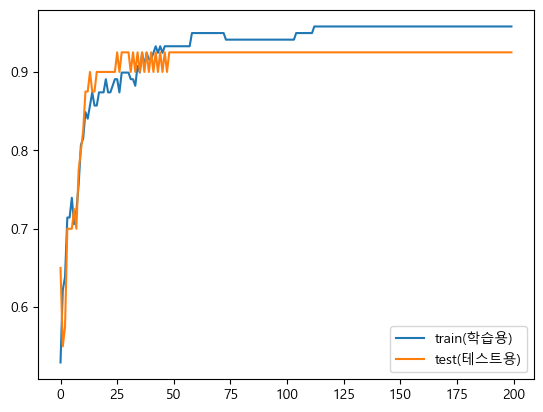

최적 epoch: 25
최고 test 점수: 0.925


In [9]:
import numpy as np
# 넘파이 import

import ssl
import certifi
import pandas as pd
# 판다스 import

import matplotlib.pyplot as plt
# 맷플롯립 import
# 1) 한글 폰트 지정 (Windows 기본)
plt.rcParams["font.family"] = "Malgun Gothic"

# 2) 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

# 1.데이터 불러오기
ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())
fish = pd.read_csv('https://bit.ly/fish_csv_data')
print(fish.head())
# 판다스에서 csv 데이터를 불러옴

# 2. 입력(x) / 정답 (y) 분리
X = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
y = fish['Species'].to_numpy()
# 넘파이 배열로 변경한다.
# 정답은 물고기의 종류

# 3. 훈련과 테스트를 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 4. 표준화
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 5. SGD 모델 생성
sgd = SGDClassifier(loss='log_loss',random_state=42)

classes = np.unique(y_train)

train_score = []
test_score = []

# 6. 에포크 반복 학습
for epoch in range(200):  # 에포크 학습 200번 반복
    sgd.partial_fit(X_train_s, y_train, classes=classes) # 점진적 학습 표준화된 X 데이터와 학습 정답
    train_score.append(sgd.score(X_train_s, y_train))  # 에포스하면서 빈 리스트 파일에 추가  학습용 데이터
    test_score.append(sgd.score(X_test_s, y_test))     # 에포스하면서 빈 리스트 파일에 추가  테스트용 데이터

# 7. 그래프 확인
plt.plot(train_score,label='train(학습용)')
plt.plot(test_score, label='test(테스트용)')
plt.legend()
plt.show()

best_epoch = np.argmax(test_score)
best_score = np.max(test_score)

print("최적 epoch:", best_epoch)
print("최고 test 점수:", best_score)